# Quantum Free Falling

A quantum particle of mass $m$ is in a uniform gravitational field $g$.  The stationary Schr&ouml;dinger equation is 

$$
\left ( -\frac{\hbar^2}{2m} \frac{d^2}{dy^2} + m g y \right ) \psi(y) = E \psi(y)
$$(eq:quantum_falling)

where $y$ and $E$ are the position and energy of the particle.  We assume that the particle is dropped from $y=0$ and the gravitational potential energy is also measured from $y=0$.  Under this reference conditions, $E=0$.

Using a normalized coordinate $x=\left( \displaystyle\frac{2 m^2 g}{\hbar^2} \right )^{1/3} y$, Eq. {eq}`eq:quantum_falling` is simplified to

$$
\frac{d^2}{d x^2} \psi(x) = x \psi(x)
$$(eq:airy)

which is known as Airy equation.  Despite of its simple looking, the solution to this equation cannot be expressed in a closed form.  General solution to this differential equation is written as

$$
\psi(x) = c_1 \text{Ai}(x) + c_2 \text{Bi}(x)
$$

where $\text{Ai}(x)$ and $\text{Bi}(x)$ are first and second kind of Airy functions.{cite}`Airy`

Now we apply the first boundary condition.  Since the particle should not be found at $x=\infty$, we impose $\displaystyle\lim_{x \rightarrow \infty} \psi(x) = 0$.  If this is the classical particle, the particle should not move upward.  However, due to uncertainty principle, the quantum particle can be observed slightly above $x=0$.
Since $\displaystyle\lim_{x \rightarrow \infty} \text{Bi}(x) = \infty$, we immediately conclude that $c_2=0$.  What is the second boundary condition?  It turns out that physics imposes no additional condition.\footnote{This is an unbound state and thus we cannot normalize the wave function.}  Hence, $c_1$ can be any finite value.{1} We could impose a condition such as $\psi(0)=1$ for convenience. It makes the numerical method more time consuming. Therefore, we don't use additional boundary condition and we will utilize this freedom in the numerical method.   

One may try to evaluate the analytical solution.  The integral form of $\text{Ai}(x)$ is given by

$$
\text{Ai}(x) = \frac{1}{\pi} \int_0^\infty \cos \left ( \frac{t^3}{3}+x t \right ) dt.
$$

This integral is _super improper_ and none of standard numerical quadrature works.   It is much faster and more accurate to integrate the ODE {eq}`eq:airy` numerically.  There are other ways to evaluate the Airy functions and many numerical libraries include them. The `scipy` package has a built-in Airy function `airy()`.  However, numerical methods to evaluate Airy functions are still actively investigated.

Now, we try to solve the problem by direct numerical integration of the ODE. 
Noting that Eq. {eq}`eq:airy` is a special case of Eq. {eq}`eq:sturm` with $w(x)=-x$ and $S(x)=0$, we can integrate it with the Numerov method.  The rigorous boundary condition is $\displaystyle\lim_{x \rightarrow \infty} \psi(x) = 0$ but we replace it with $\psi(x_\text{max})=0, x_\text{max} \gg 1$.  Considering a similar ODE, $y''=y$, has a solution $y \sim e^{-x}$, we expect $\text{Ai}(x)$ vanishes very quickly, $x_\text{max}=5$ is sufficiently large. 
 In order to use the Numerov method, we need $\psi(x_\text{max}-h)$.
As we discussed above, if $\psi(x)$ is a solution,   $c \psi(x)$ is also a solution and thus we don't have to worry about the magnitude.  This implies that $\psi(x_\text{max}-h)$ can be any finite value. Now we have two points to start the iterations.  At the end, we fix the absolute magnitude by letting $\psi(0)=1$.  This is not a physical condition but just for our convenience.

[^1]: It is a convention to set $\text{Ai}(0)=\frac{\Gamma(\frac{2}{3})}{3^{2/3}} = 0.355028\dots$.{cite}`Airy`

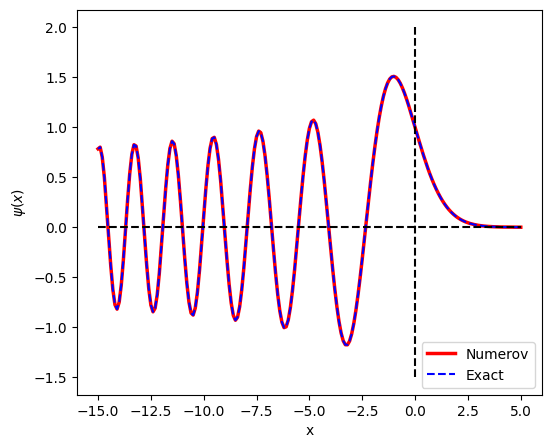

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy 

# define w(x) in Numerov method
def W(x):
    return -x

# control parameters
xmax = 5.0
xmin = -15.0

# Integrating from xmax to 0
N = 200
h = (xmin-xmax)/N
x = np.linspace(xmax,xmin,N+1)
y = np.zeros(N+1)
w = np.zeros(N+1)

# initial conditions
y[0] = 0
w[0] = W(x[0])

# we guess next value
y[1] = y[0]+0.1
w[1] = W(x[1]);

# shoot left by the Numerov method
for n in range(1,N):
  w[n+1] = W(x[n+1]);
  y[n+1] = 2.0*(1.0-5.0*h**2*w[n]/12.0)*y[n] - (1.0+h**2*w[n-1]/12.0)*y[n-1]
  y[n+1] = y[n+1]/(1.0+h**2*w[n+1]/12.0)

# normalization
N0 = np.int32(-xmax/h) # find the location of x=0
y[:] = y[:]/y[N0]


plt.figure(figsize=(6,5))
plt.plot(x,y,'-r',label="Numerov",linewidth=2.5)
plt.plot(x,airy(x)[0]/airy(0)[0],'--b',label="Exact")
plt.xlabel('x')
plt.ylabel(r'$\psi(x)$')
plt.legend(loc=4)
plt.plot([-15, 5],[0,0],'--k',[0,0],[-1.5,2],'--k')
plt.show()



---
Last updated: {sub-ref}`today`